In [14]:
#Imports
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [15]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


#### Use the above dataset for the exercises below:
#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [16]:
temps = data.sf_temps()
temps

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


In [17]:
# Lets convert the 'Date' column in our df to pandas datetime object using pd.to_datetime()
temps.date = pd.to_datetime(temps.date, format='%Y-%m-%d %I-%p')
temps.date


0      2010-01-01 00:00:00
1      2010-01-01 01:00:00
2      2010-01-01 02:00:00
3      2010-01-01 03:00:00
4      2010-01-01 04:00:00
               ...        
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: date, Length: 8759, dtype: datetime64[ns]

In [18]:
# Set 'Date' column as Index and sort the index:
temps = temps.set_index('date').sort_index()
temps.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


In [19]:
#Resample by day
temps.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


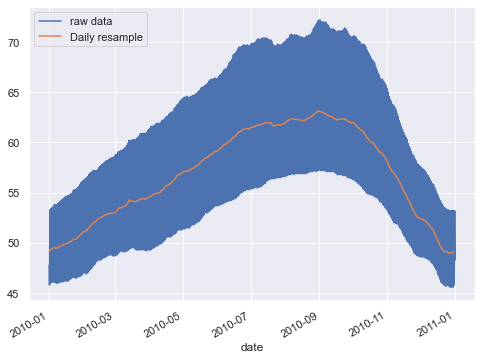

In [21]:
# Plot raw data with daily resampled data
temps.temp.plot(label = 'raw data')
temps.resample('D').mean().temp.plot(label = 'Daily resample')
plt.legend();

#### 2. Write the code necessary to visualize the minimum temperature over time.


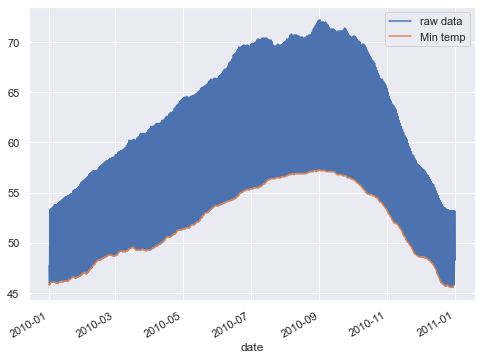

In [22]:
temps.temp.plot(label = 'raw data')
temps.resample('D').min().temp.plot(label = 'Min temp')
plt.legend();

#### 3. Write the code necessary to visualize the maximum temperature over time.


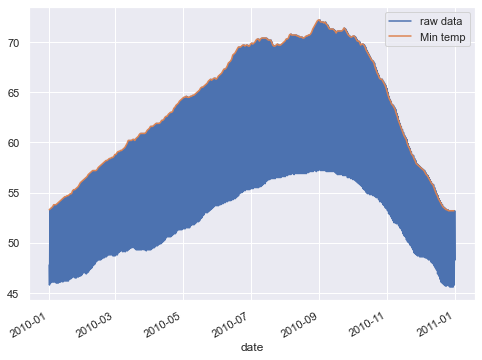

In [23]:
temps.temp.plot(label = 'raw data')
temps.resample('D').max().temp.plot(label = 'Min temp')
plt.legend();

#### 4. Which month is the coldest, on average?






In [24]:
#Resample and find mean by month
temps.resample('M').mean()

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97
2010-06-30,60.44
2010-07-31,61.77
2010-08-31,62.41
2010-09-30,62.49


- Janurary is the coldest month on average(49.98)

#### 5. Which month has the highest average temperature?


In [25]:
#Resample and find mean by month
temps.resample('M').mean()

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97
2010-06-30,60.44
2010-07-31,61.77
2010-08-31,62.41
2010-09-30,62.49


- September has the highest average temperature(62.49)

In [29]:
# Use mean.max method
temps.resample('M').mean().max()

temp   62.49
dtype: float64

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?





In [30]:
#Daily resample 
daily_temp = temps.resample('D').mean()

In [33]:
daily_temp.head()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49


In [35]:
#Find daily max temp 
daily_temp['max'] = temps.resample('D').max()
daily_temp.head()

,temp,max
date,,
2010-01-01,49.17,53.30
2010-01-02,49.30,53.40
2010-01-03,49.39,53.50
2010-01-04,49.45,53.60
2010-01-05,49.49,53.80


In [37]:
#Find daily min temp 
daily_temp['min'] = temps.resample('D').min()
daily_temp.head()


,temp,max,min
date,,,
2010-01-01,49.17,53.30,45.80
2010-01-02,49.30,53.40,46.00
2010-01-03,49.39,53.50,46.10
2010-01-04,49.45,53.60,46.10
2010-01-05,49.49,53.80,46.10


In [40]:
# Can we find temp delta between max and min?
daily_temp['delta'] = daily_temp['max'] - daily_temp['min']
daily_temp.head()


,temp,max,min,delta
date,,,,
2010-01-01,49.17,53.30,45.80,7.50
2010-01-02,49.30,53.40,46.00,7.40
2010-01-03,49.39,53.50,46.10,7.40
2010-01-04,49.45,53.60,46.10,7.50
2010-01-05,49.49,53.80,46.10,7.70


In [42]:
daily_temp.max()

temp    63.13
max     72.20
min     57.30
delta   15.00
dtype: float64

In [43]:
#Locate day of max delta
daily_temp[daily_temp.delta == daily_temp.delta.max()]

,temp,max,min,delta
date,,,,
2010-08-31,63.13,72.20,57.20,15.00


In [44]:
daily_temp.resample('M').mean()

,temp,max,min,delta
date,,,,
2010-01-31,49.98,54.65,46.31,8.34
2010-02-28,52.24,57.55,48.06,9.49
2010-03-31,53.96,60.09,49.24,10.85
2010-04-30,55.63,62.65,50.33,12.32
2010-05-31,57.97,65.31,52.40,12.91
2010-06-30,60.44,68.43,54.48,13.95
2010-07-31,61.77,70.02,56.05,13.98
2010-08-31,62.41,70.81,56.94,13.87
2010-09-30,62.49,71.31,56.90,14.40


#### - August had largest daily delta
#### - September has largest delta mean

#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

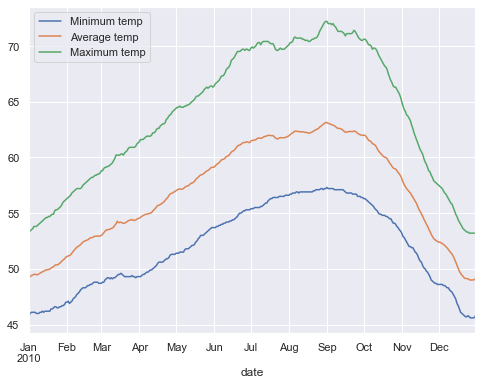

In [46]:
temps.resample('D').min().temp.plot(label = 'Minimum temp')
temps.resample('D').mean().temp.plot(label = 'Average temp')
temps.resample('D').max().temp.plot(label = 'Maximum temp')
plt.legend()

In [47]:
from vega_datasets import data
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun


##### Use the above dataset for the exercises below:

#### 1. Which year and month combination has the highest amount of precipitation?

In [49]:
seattle = data.seattle_weather()
seattle

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun


In [50]:
# Lets convert the 'Date' column in our df to pandas datetime object using pd.to_datetime()
seattle.date = pd.to_datetime(seattle.date, format='%Y-%m-%d %I-%p')
seattle.date

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [51]:
# Set 'Date' column as Index and sort the index:
seattle = seattle.set_index('date').sort_index()
seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [61]:
#Resample by month
seattle.precipitation.resample('M').sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [63]:
seattle.precipitation.resample('M').sum().max()

284.5000000000001

In [76]:
print("The year and month combination with the highest amount of precipitation is 2015-12-31 with a max sum of 284.5000000000001")

The year and month combination with the highest amount of precipitation is 2015-12-31 with a max sum of 284.5000000000001


#### 2. Visualize the amount of monthly precipitation over time.


Text(0, 0.5, 'Precipitation')

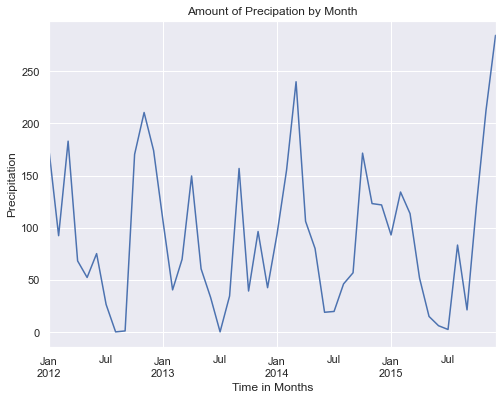

In [67]:
seattle.precipitation.resample('M').sum().plot()
plt.title('Amount of Precipation by Month')
plt.xlabel('Time in Months')
plt.ylabel('Precipitation')

#### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


Text(0, 0.5, 'Winds')

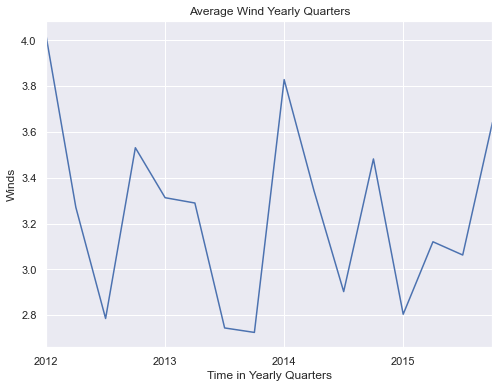

In [69]:
seattle.wind.resample('Q').mean().plot()
plt.title('Average Wind Yearly Quarters')
plt.xlabel('Time in Yearly Quarters')
plt.ylabel('Winds')

#### 4. Which year-month combination is the windiest?


In [75]:
seattle.wind.resample('M').mean().idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

In [77]:
seattle.wind.resample('M').mean().max()

4.5285714285714285

In [78]:
"The year and month combination with the highest average amount of wind is 2014-02-28 with an average wind amount of 4.5285714285714285"

'The year and month combination with the highest average amount of wind is 2014-02-28 with an average wind amount of 4.5285714285714285'

In [80]:
seattle.head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle


#### 5.What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [82]:
seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [81]:
seattle[seattle.weather == 'sun'].resample('Y').count().weather

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

In [83]:
seattle[seattle.weather == 'sun'].resample('Y').count().weather.idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

In [84]:
seattle[seattle.weather == 'sun'].resample('Y').count().weather.max()

211

In [85]:
print("The sunniest year 2014 with a sunny day county of 211")

The sunniest year 2014 with a sunny day county of 211


#### 6. In which month does it rain the most?

In [89]:
seattle['month'] = seattle.index.month
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,1
2012-01-02,10.90,10.60,2.80,4.50,rain,1
2012-01-03,0.80,11.70,7.20,2.30,rain,1
2012-01-04,20.30,12.20,5.60,4.70,rain,1
2012-01-05,1.30,8.90,2.80,6.10,rain,1


In [90]:
seattle.groupby('month').precipitation.sum()

month
1    466.00
2    422.00
3    606.20
4    375.40
5    207.50
6    132.90
7     48.20
8    163.70
9    235.50
10   503.40
11   642.50
12   622.70
Name: precipitation, dtype: float64

In [91]:
print("The month with the most rain is november with a a precipitation sum of 642.50")

The month with the most rain is november with a a precipitation sum of 642.50


In [92]:
seattle[seattle.precipitation > 0].weather.resample('M').count().idxmax()

Timestamp('2012-12-31 00:00:00', freq='M')

In [95]:
seattle[seattle.precipitation > 0].weather.resample('M').count().max

<bound method Series.max of date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: weather, dtype: int64>

In [96]:
print("The month with the most number of days with a non-zero amount of precititation is 2012-12-31 with a count of 27 days non-zero precipitation")

The month with the most number of days with a non-zero amount of precititation is 2012-12-31 with a count of 27 days non-zero precipitation


In [100]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


#### Convert any negative delays to 0.


In [102]:
flights.delay = flights.delay.apply(lambda x: 0 if x < 0 else x)


In [103]:
flights.delay.value_counts()

0      10516
5        776
3        577
2        507
10       476
       ...  
148        1
213        1
245        1
360        1
147        1
Name: delay, Length: 194, dtype: int64

#### Which hour of the day has the highest average delay


In [106]:
flights.groupby('h').delay.mean()

KeyError: 'h'

#### Does the day of the week make a difference in the delay amount?

#### Does the month make a difference in the delay amount?


In [98]:
# Bonus